In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.font_manager import FontProperties
import graphviz
import os
from pandas_profiling import ProfileReport


/Users/arkaanmuhammad/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/g9/g0s31rj12jx3cvrsfzp26r700000gn/T/ipykernel_93328/1334338646.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
from sklearn.naive_bayes import GaussianNB # continuous variables (Predictor Variables)
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import chi2, f_classif
from sklearn.impute import KNNImputer # Missing values

In [4]:
Data = pd.read_csv("winequality-red.csv")
Data_copy = Data.copy()
pd.set_option("display.max_columns", 12)
Data.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
ProfileReport(Data)

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
# Quality > 6 ---> Quality = 1 // Quality <= 6 ---> Quality = 0
Data["quality"] = np.where(Data["quality"] > 6, 1, 0)

In [ ]:
Missing_values_percent = 100*(Data.isnull().sum()/len(Data["quality"]))
print(Missing_values_percent)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


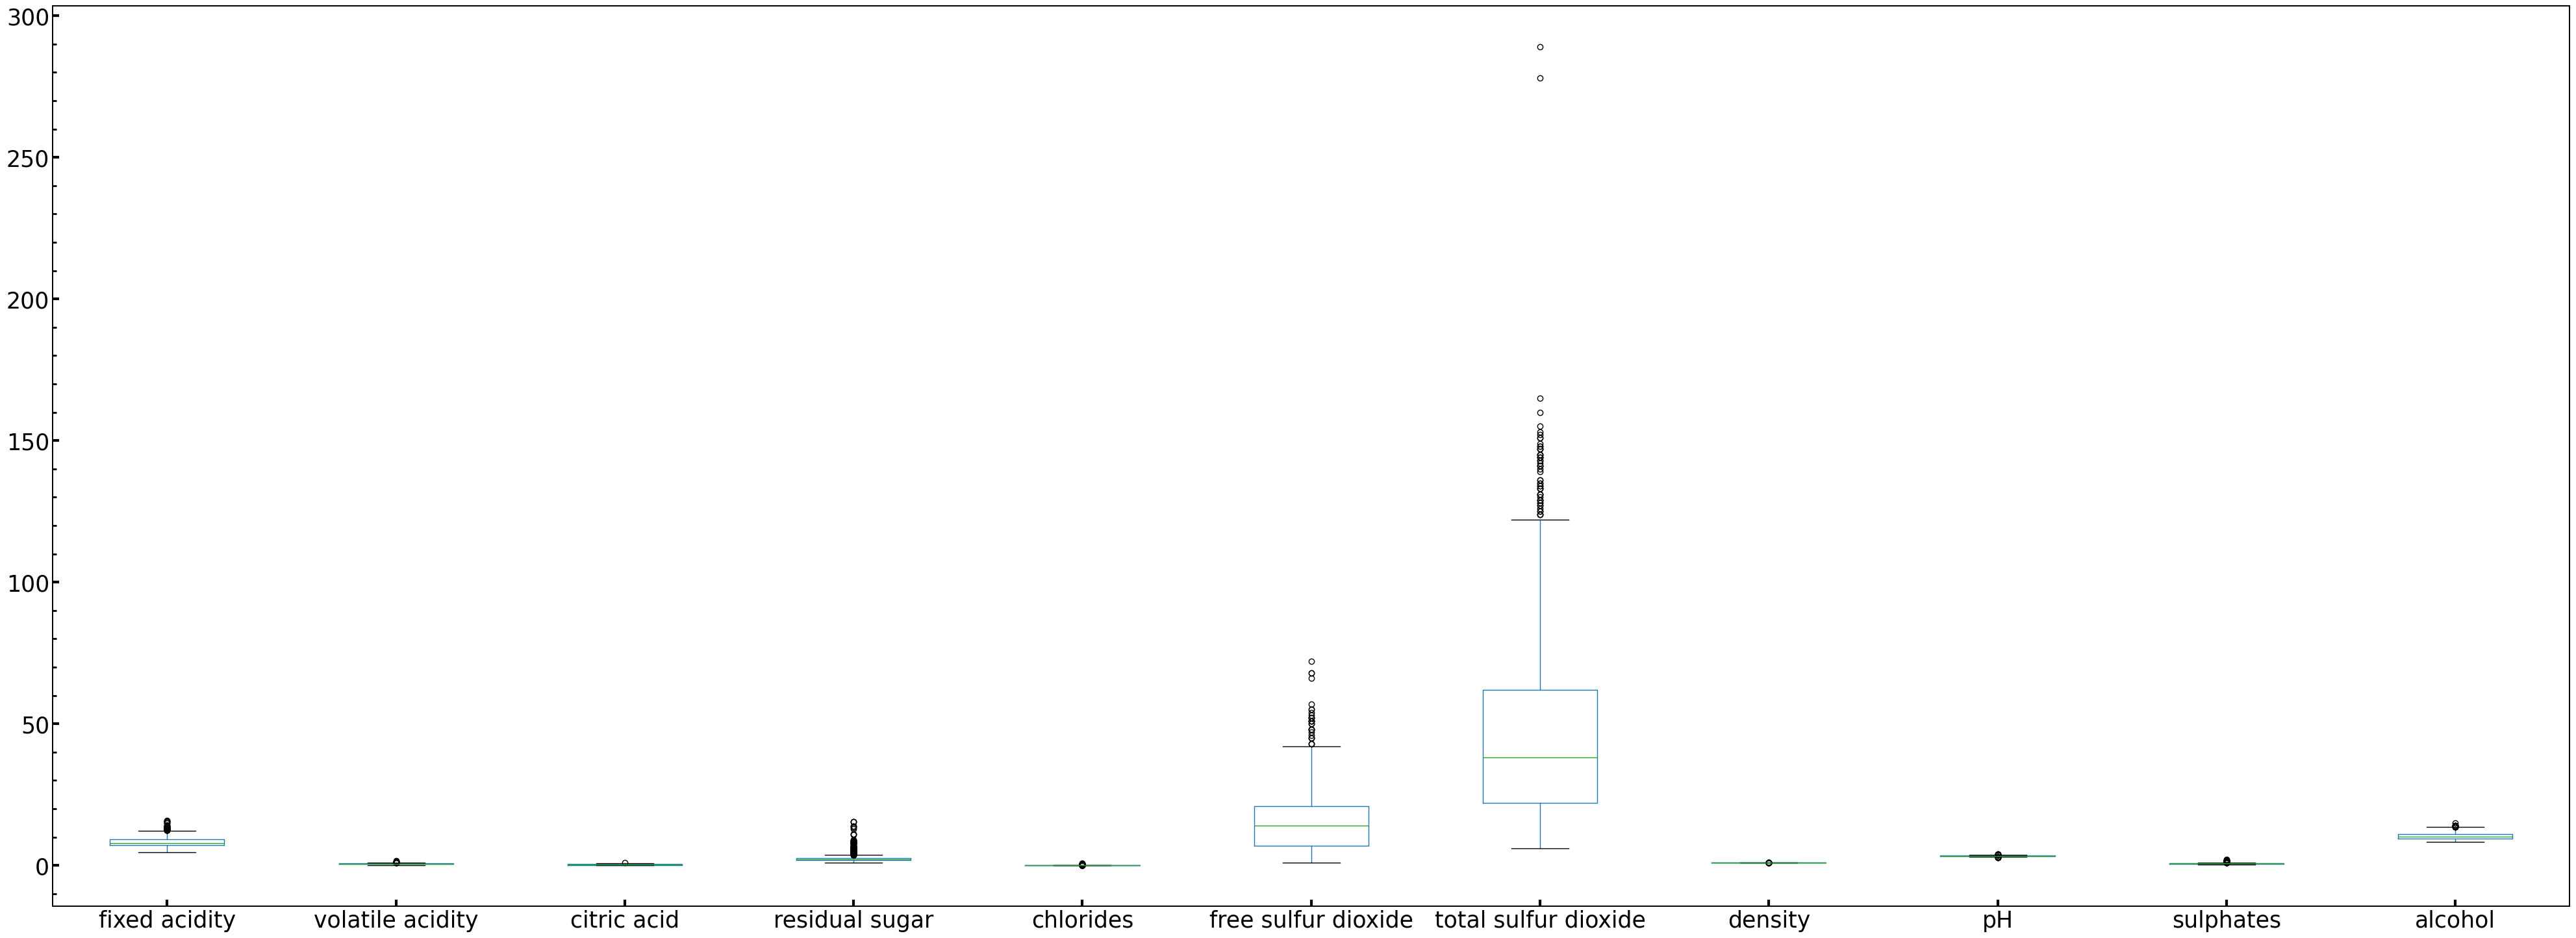

In [ ]:
fig, ax = plt.subplots(figsize = (50, 18))
Data.boxplot(column= ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"], grid = False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor='black', labelsize=25, top = False, right = False)
ax.tick_params(which = "major", direction = "in", color='black', length=7, width = 3)
ax.tick_params(which = "minor", direction = "in", color='black', length=4, width = 2, top = False, right = False, bottom = False)
for axis in ["left", "bottom", "right", "top"]:
    ax.spines[axis].set_linewidth(1.4)
plt.show()

In [ ]:
Data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

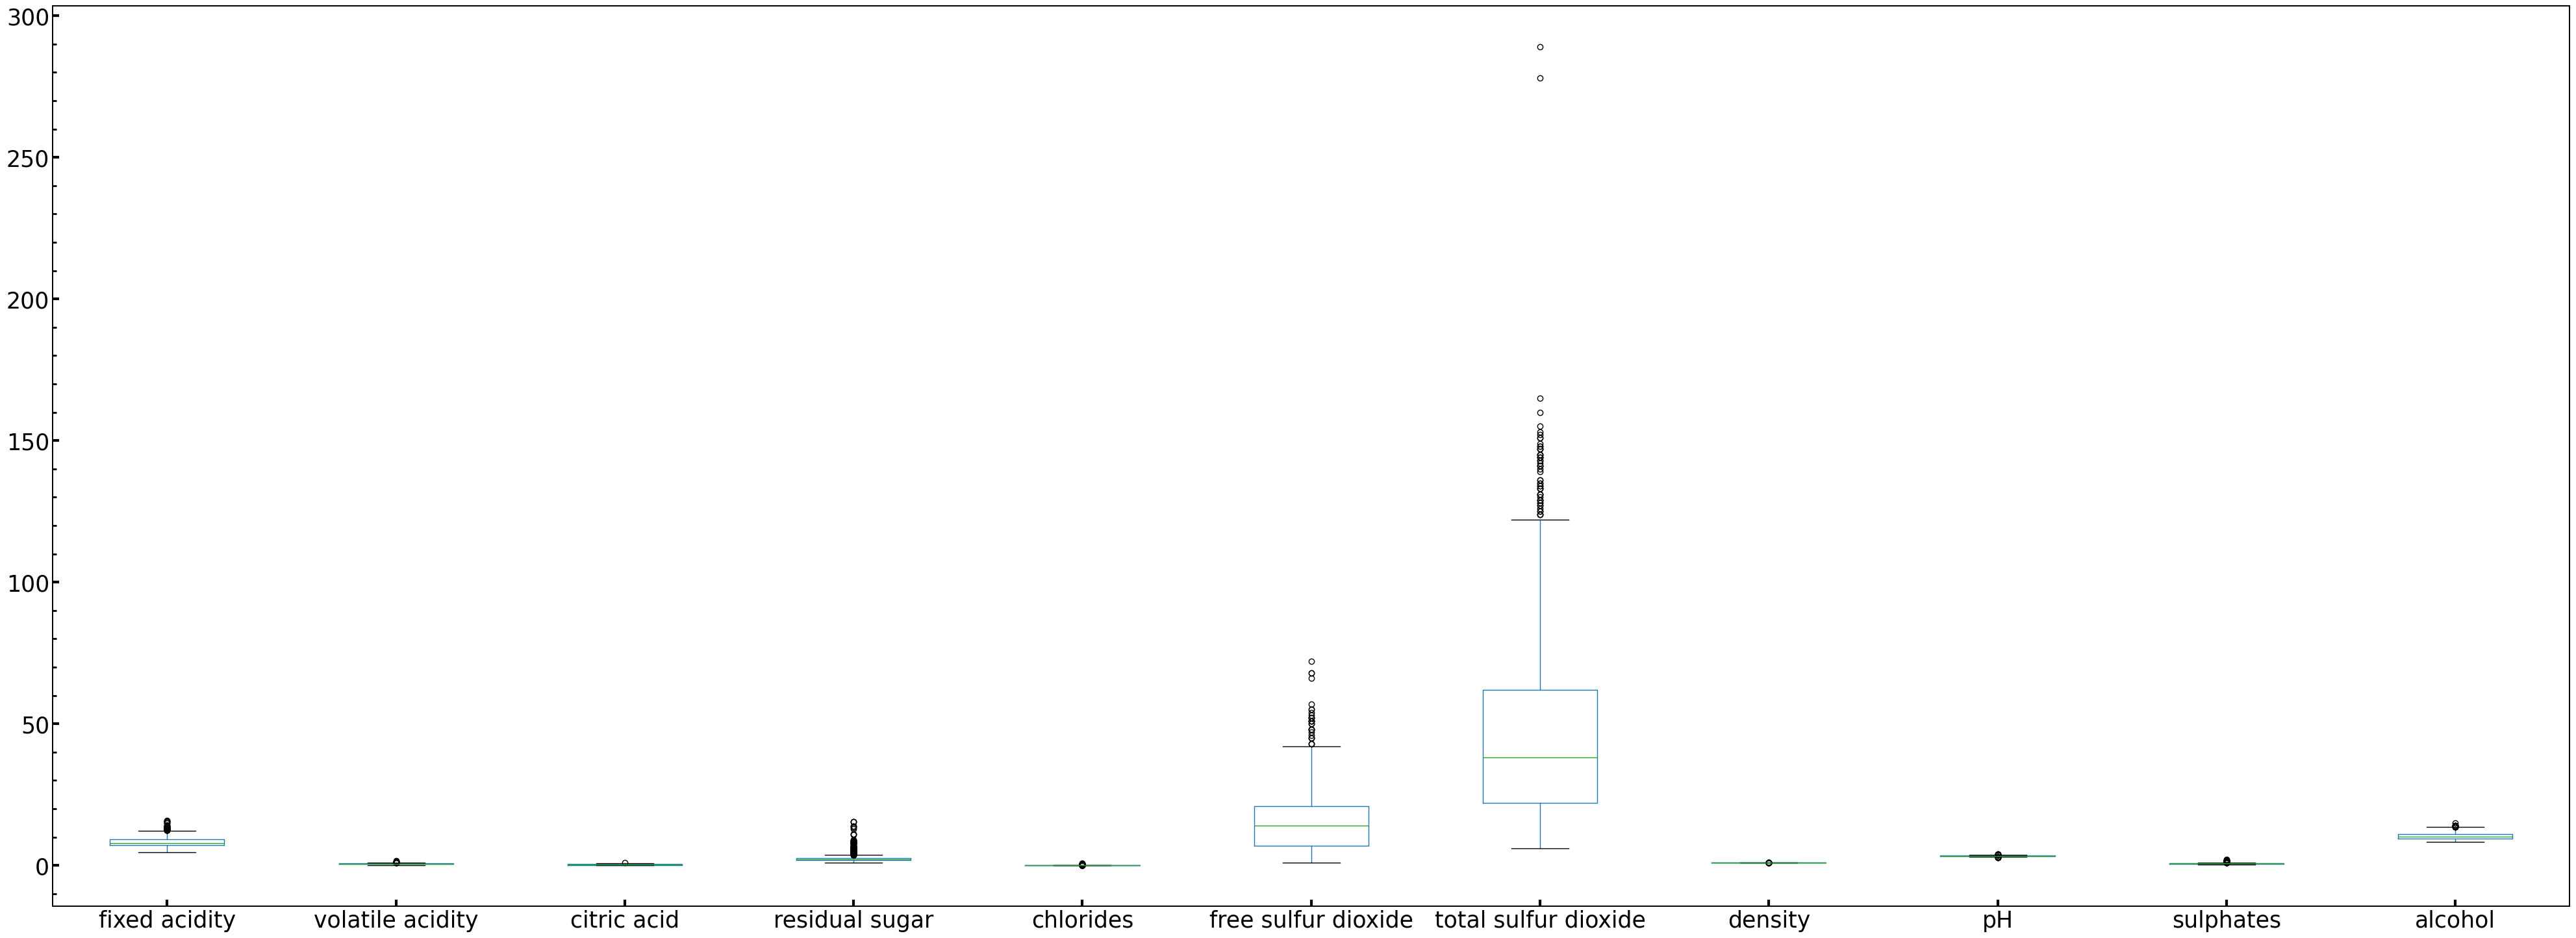

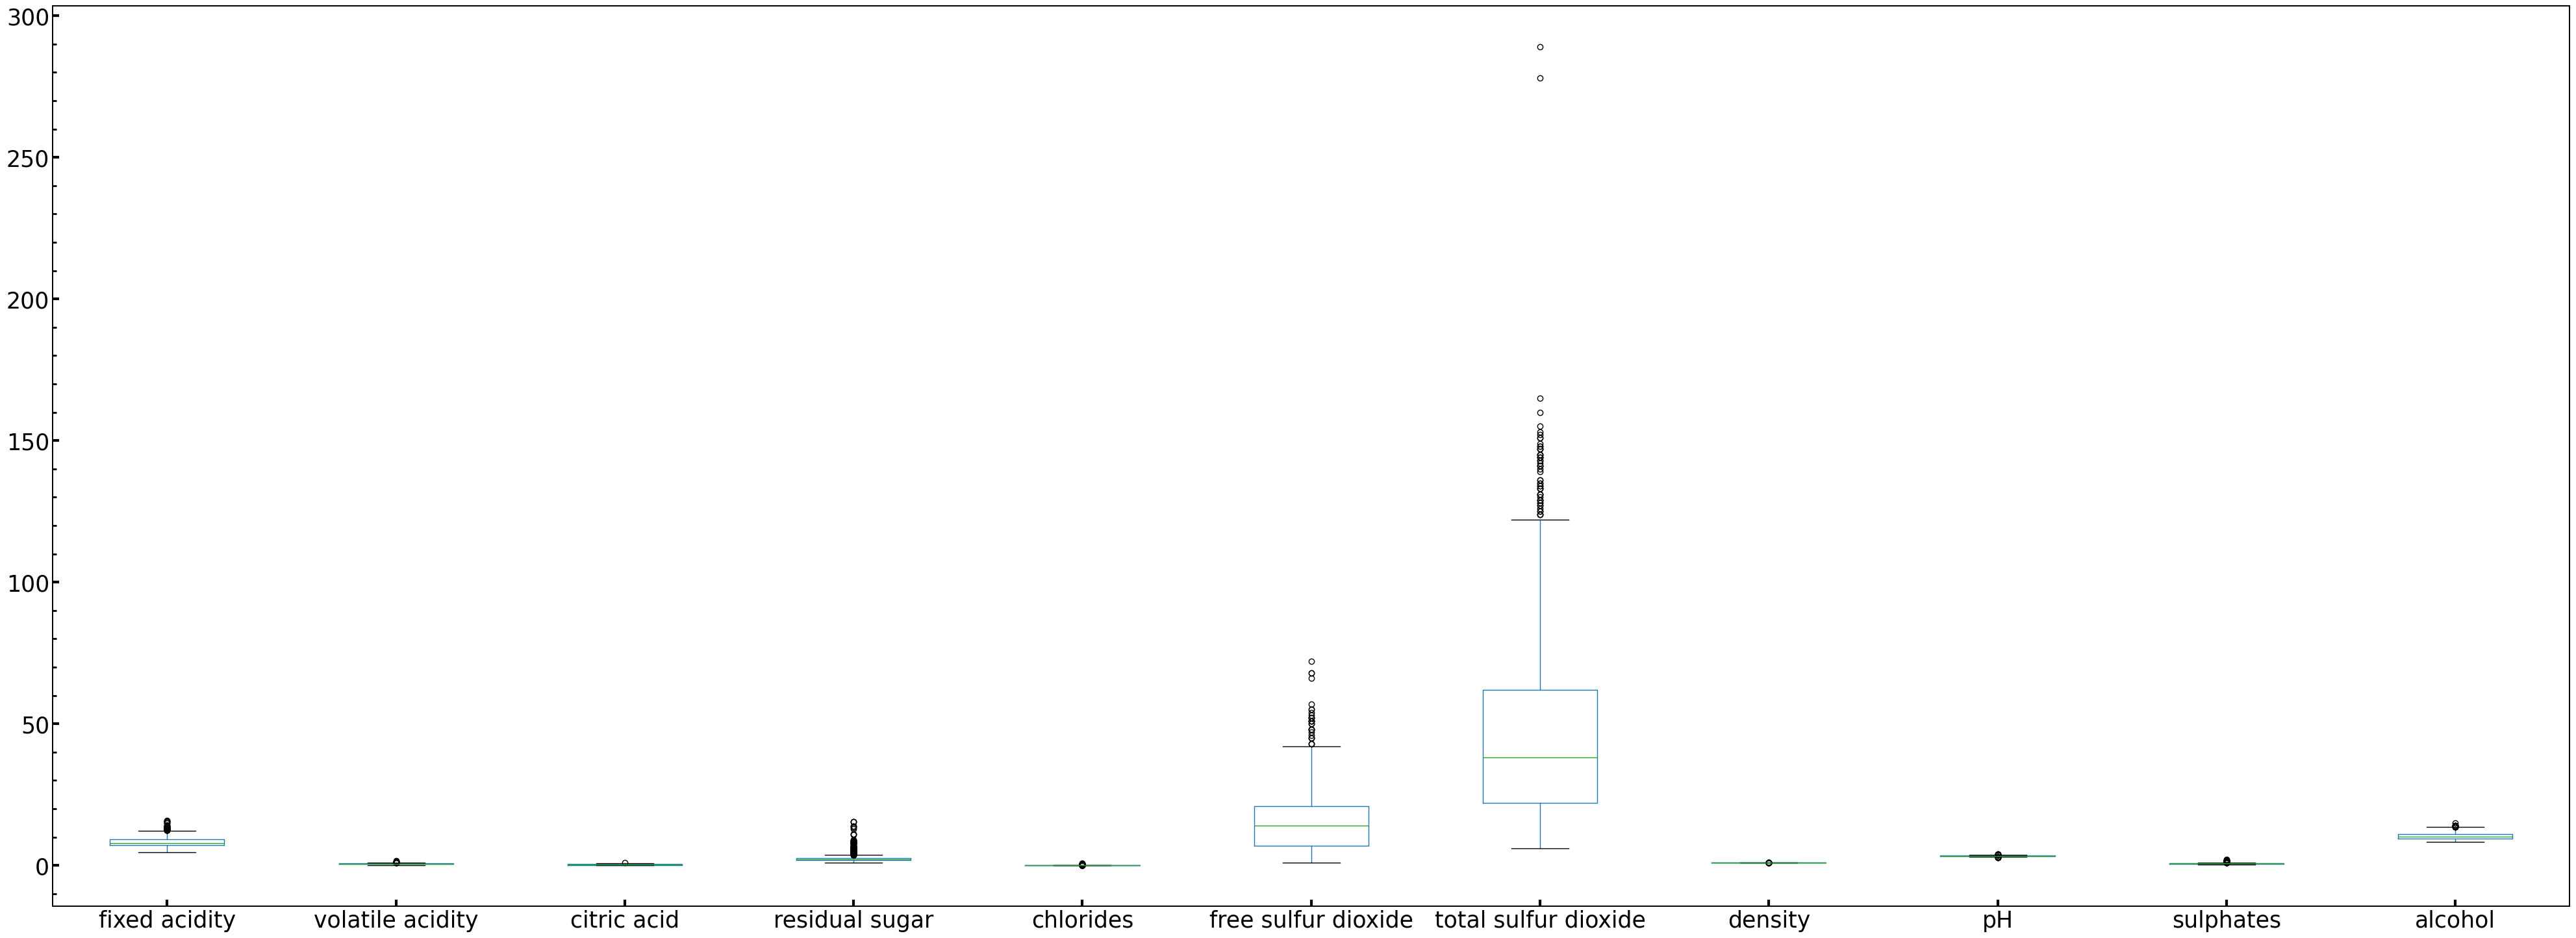

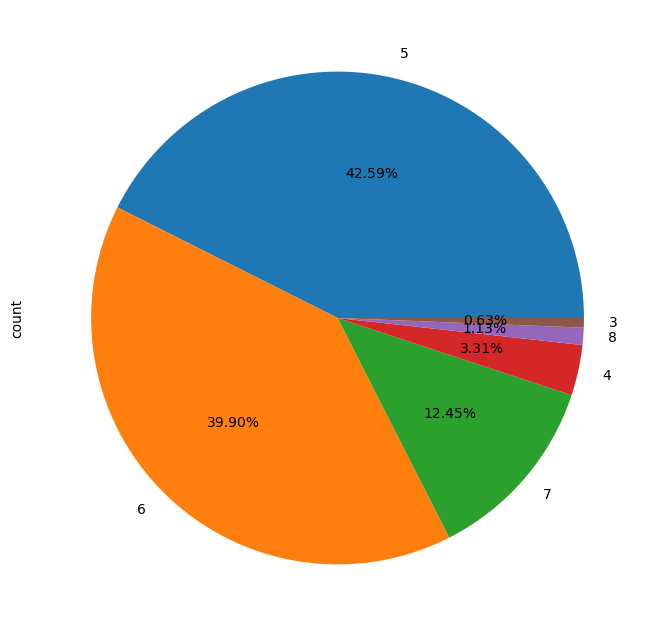

In [ ]:
plt.figure(figsize = (8,8))
Data_copy['quality'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

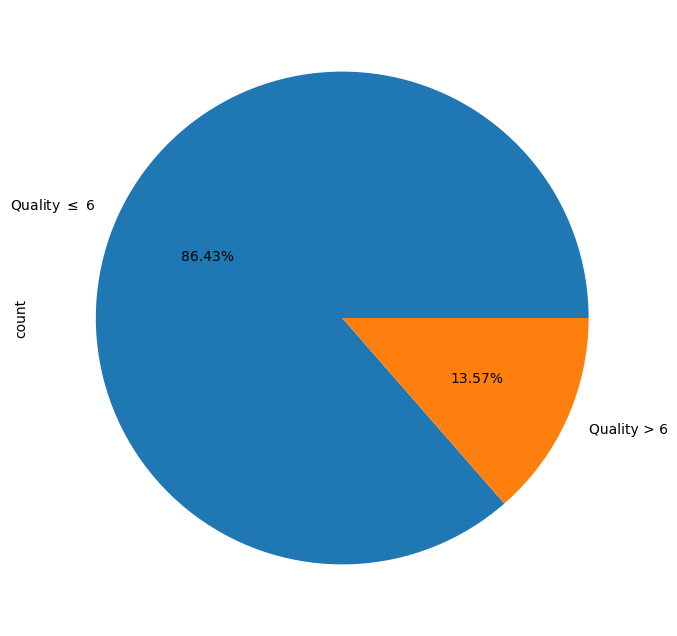

In [ ]:
plt.figure(figsize = (8,8))
Data_copy2 = Data.copy()
Data_copy2["quality"] = Data_copy2["quality"].replace({1: "Quality > 6", 0: "Quality $\leq$ 6"})
Data_copy2["quality"].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

<Figure size 5000x5000 with 0 Axes>

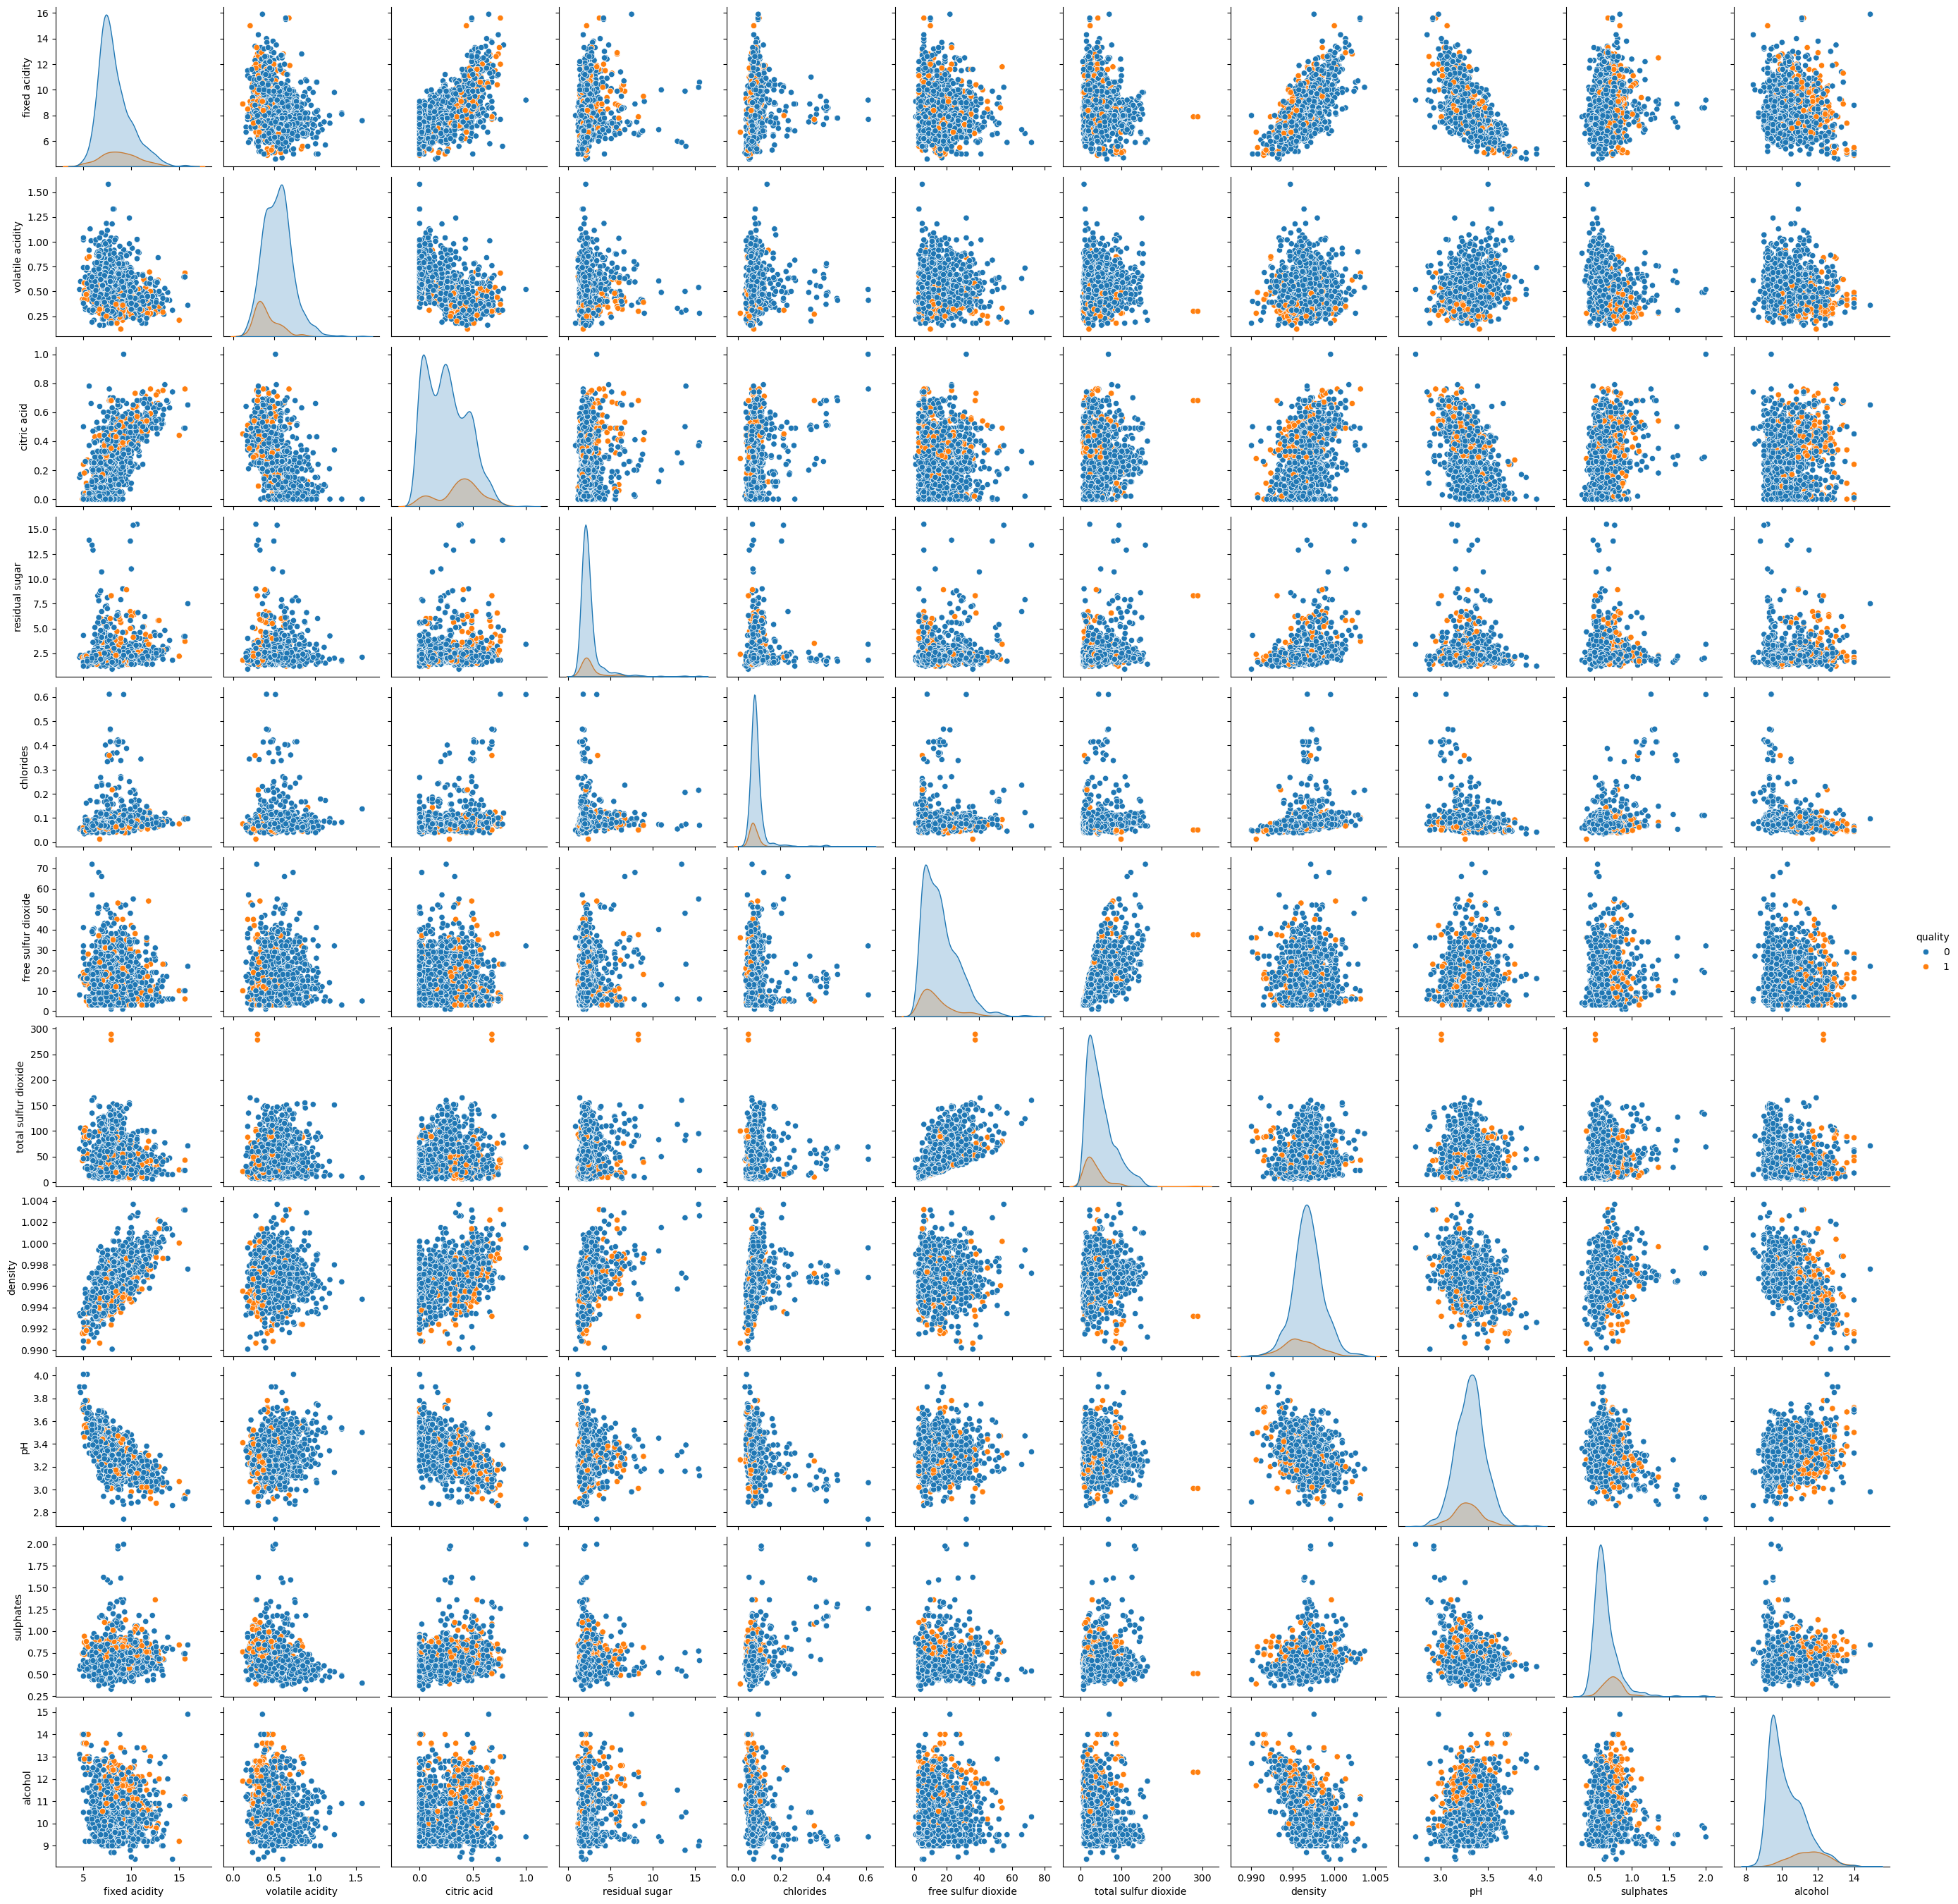

In [ ]:
plt.figure(figsize = (50, 50))
sbn.pairplot(Data, hue = "quality")
plt.show()

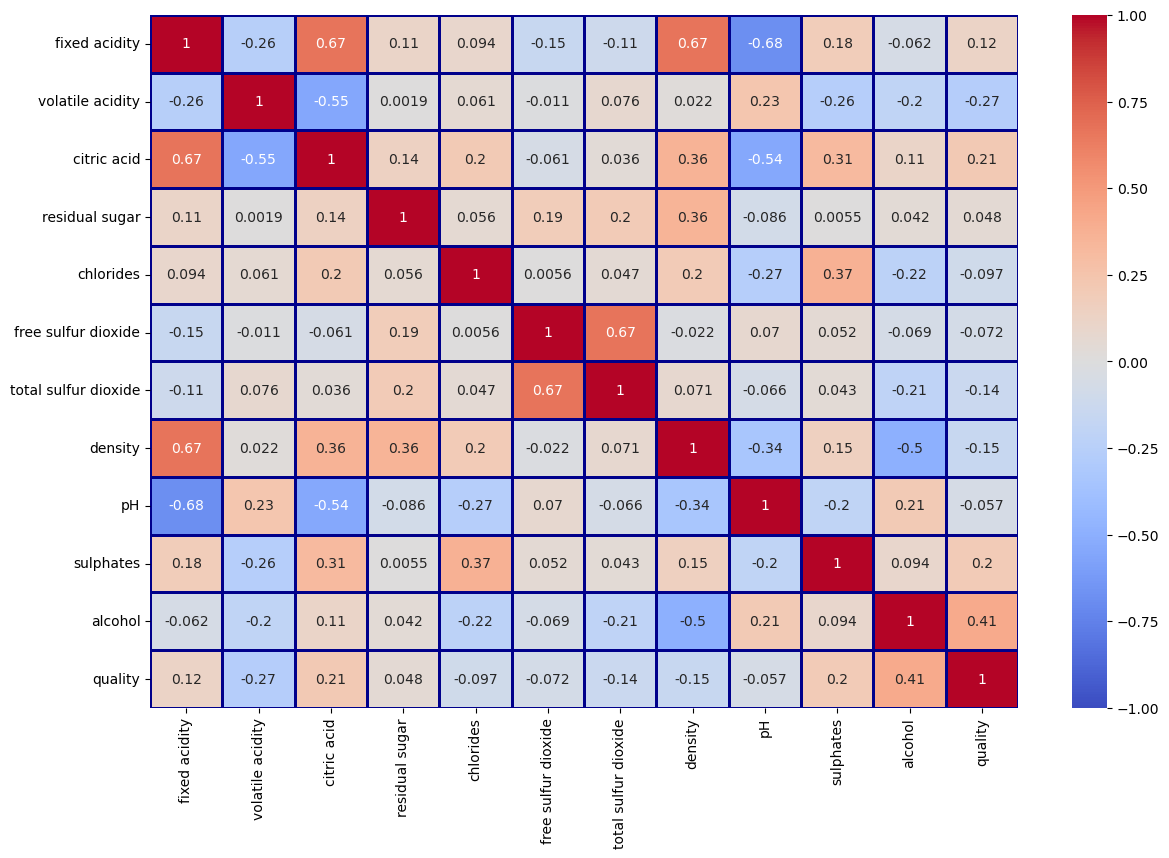

In [ ]:
plt.figure(figsize = (14, 9))
sbn.heatmap(Data.corr(), annot = True, vmin = -1, vmax = +1, cmap = "coolwarm",  linewidth = 2.1, linecolor = "darkblue")
plt.show()

In [ ]:
plt.figure(figsize = (14, 9))
triu = np.triu(Data.corr())
sbn.heatmap(Data.corr(), annot = True, vmin = -1, vmax = +1, cmap = "coolwarm", mask = triu)
plt.show()

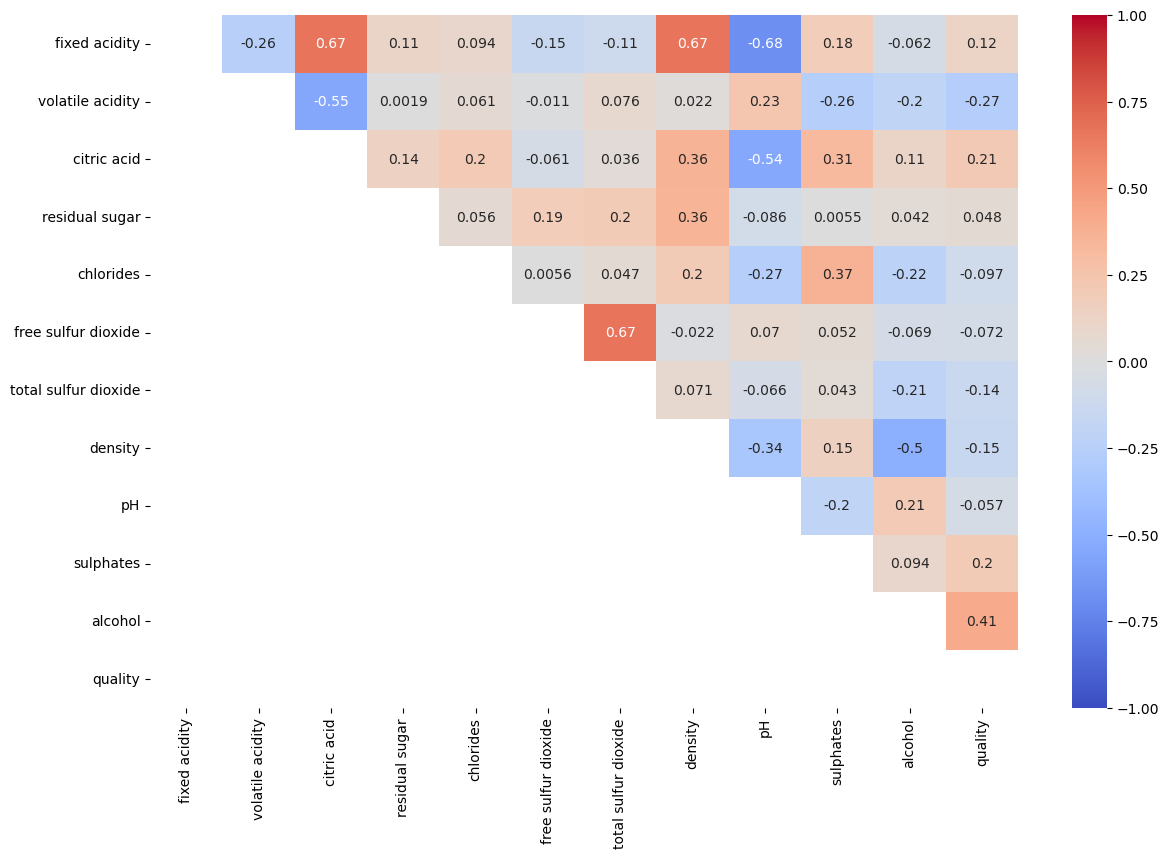

In [ ]:
plt.figure(figsize = (14, 9))
tril = np.tril(Data.corr())
sbn.heatmap(Data.corr(), annot = True, vmin = -1, vmax = +1, cmap = "coolwarm", mask = tril)
plt.show()

In [ ]:
x = Data.drop("quality", axis = 1)
y = Data["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 9)

Decision Tree

In [ ]:
criterion = ["gini", "entropy"]
ModelTree = DecisionTreeClassifier()
max_depth = np.array([2, 3, 4, 5, 6, 7, 8, 9])
min_samples_split = np.array([2, 3, 4, 5, 6, 7, 8, 9])
param_grid = {"criterion": criterion, "max_depth": max_depth, "min_samples_split": min_samples_split}
GridTree = GridSearchCV(estimator = ModelTree, param_grid = param_grid, cv = 5, n_jobs = 3)
GridTree.fit(x_train, y_train)
print(GridTree.best_estimator_.criterion)
print(GridTree.best_estimator_.max_depth)
print(GridTree.best_estimator_.min_samples_split)

gini
6
2


In [ ]:
ModelTree = DecisionTreeClassifier(max_depth = 6, min_samples_split=6)
ModelTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=6)

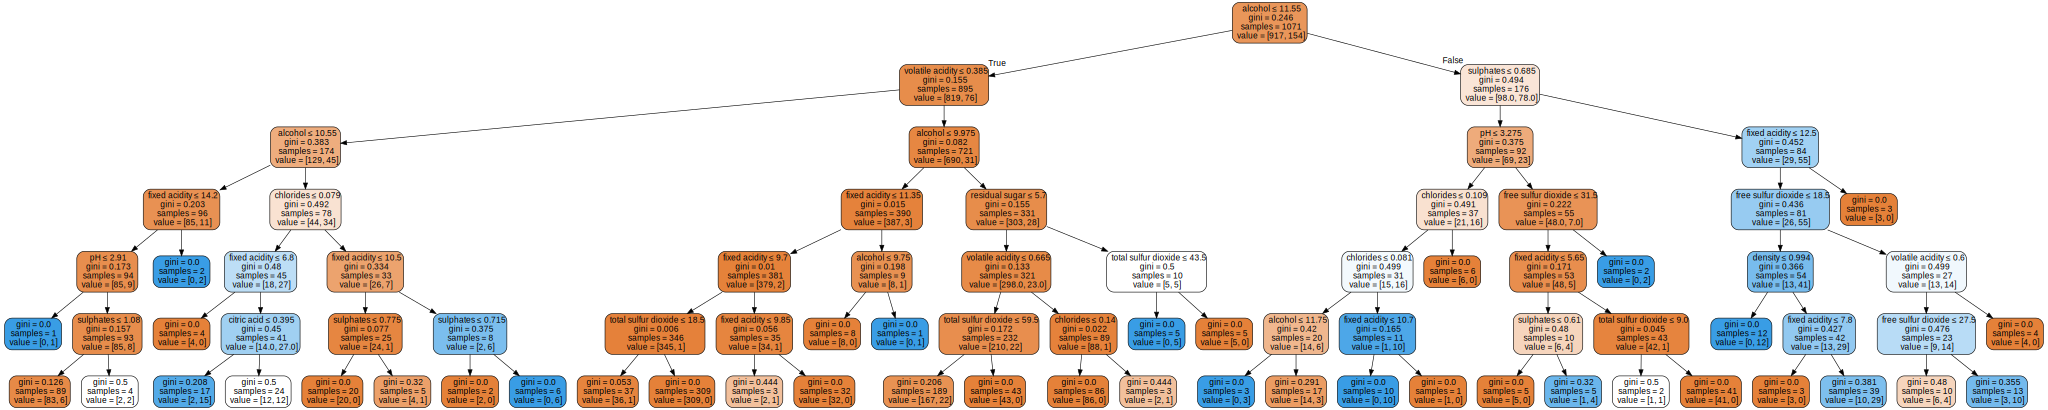

In [ ]:
Data_dot = export_graphviz(ModelTree, out_file = None, feature_names = list(x_train.columns), filled = True,
               rounded = True, special_characters = True, leaves_parallel = False, rotate = False)
graphviz.Source(Data_dot)

In [ ]:
y_predTree = ModelTree.predict(x_test)

In [ ]:
MatrixTree = confusion_matrix(y_test, y_predTree)

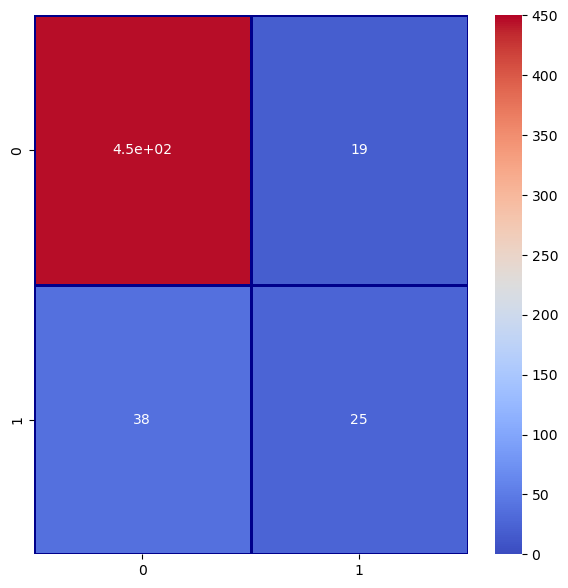

In [ ]:
plt.figure(figsize = (7, 7))
sbn.heatmap(MatrixTree, annot = True, vmin = 0, vmax = 450, cmap = "coolwarm",  linewidth = 2.1, linecolor = "darkblue")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_predTree)}")
print(f"Recall: {recall_score(y_test, y_predTree)}")
print(f"Precision: {precision_score(y_test, y_predTree)}")
print(f"f1_score: {f1_score(y_test, y_predTree)}")

Accuracy: 0.8920454545454546
Recall: 0.3968253968253968
Precision: 0.5681818181818182
f1_score: 0.4672897196261682


NAIVE BAYES


In [ ]:
ModelNB = GaussianNB()
ModelNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_predNB = ModelNB.predict(x_test)

In [ ]:
MatrixNB = confusion_matrix(y_test, y_predNB)

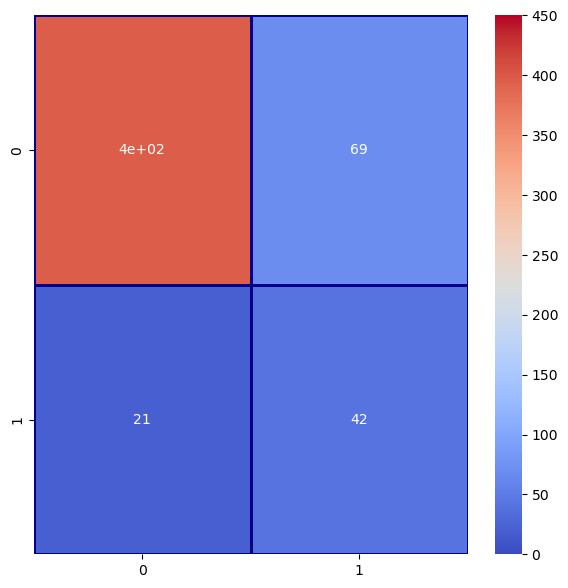

In [ ]:
plt.figure(figsize = (7, 7))
sbn.heatmap(MatrixNB, annot = True, vmin = 0, vmax = 450, cmap = "coolwarm",  linewidth = 2.1, linecolor = "darkblue")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_predNB)}")
print(f"Recall: {recall_score(y_test, y_predNB)}")
print(f"Precision: {precision_score(y_test, y_predNB)}")
print(f"f1_score: {f1_score(y_test, y_predNB)}")

Accuracy: 0.8295454545454546
Recall: 0.6666666666666666
Precision: 0.3783783783783784
f1_score: 0.4827586206896552
